In [37]:
import tensorflow as tf

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data gathering and Data prep

In [39]:
mnist = tf.keras.datasets.mnist # hand written digits, 28 x 28 images

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data();

# Display a couple of images

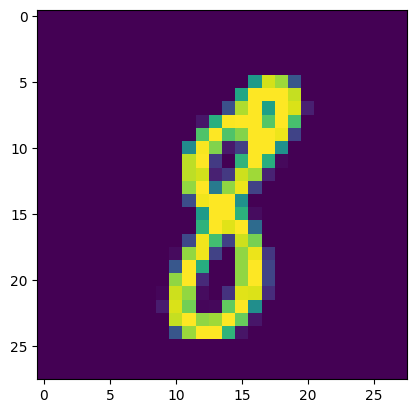

In [41]:
plt.imshow(x_train[300]) # example number 8

In [42]:
print(x_train[300]) # raw data

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 138 238
  217  68   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 150 254 254
  254 232   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  63 224 254 145
  254 240  22   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  15 160 253 25

In [43]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [44]:
print(x_train[300])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [45]:
model = tf.keras.models.Sequential()

In [46]:
model.add(tf.keras.layers.Flatten())

# We have 784 inputs (28x28 with input flattened
# 128 in the first hidden layer, 128 in the second layer, 10 output layer

In [47]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # first hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # output layer

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [49]:
model.build(x_train.shape)

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (60000, 784)              0         
                                                                 
 dense_3 (Dense)             (60000, 128)              100480    
                                                                 
 dense_4 (Dense)             (60000, 128)              16512     
                                                                 
 dense_5 (Dense)             (60000, 10)               1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2624 - accuracy: 0.9228
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1084 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0723 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0543 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0408 - accuracy: 0.9864


In [52]:
# Note that loss should drop and accuracy should increase during each epoch above

In [62]:
val_loss, val_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 825us/step - loss: 0.0869 - accuracy: 0.9757


# Save Model

In [70]:
model.save('imageFullyConnected.model')

INFO:tensorflow:Assets written to: imageFullyConnected.model/assets


# Load in the saved model

In [65]:
modelReadIn = tf.keras.models.load_model('imageFullyConnected.model')

In [66]:
predictions = modelReadIn.predict([x_test])

313/313 [==============================] - 0s 820us/step


In [67]:
print(predictions)

[[3.3009387e-11 3.5767913e-11 6.1545308e-08 ... 9.9999660e-01
  8.0723978e-10 5.8172174e-07]
 [3.6573918e-11 2.6834682e-06 9.9999720e-01 ... 7.4628470e-10
  4.0599860e-11 2.1502581e-15]
 [3.6507317e-09 9.9992830e-01 1.8719717e-07 ... 2.2703857e-06
  6.7862340e-05 5.9960684e-08]
 ...
 [2.0196443e-10 5.8040479e-07 9.6209023e-09 ... 2.7355020e-06
  2.7486908e-07 2.2701359e-05]
 [1.3657993e-08 4.3441457e-08 8.2310991e-10 ... 8.7224336e-08
  2.3648778e-03 2.8364067e-09]
 [7.7605975e-09 4.0837750e-11 4.0026538e-09 ... 2.3837902e-11
  1.0229213e-07 8.4335247e-11]]


9


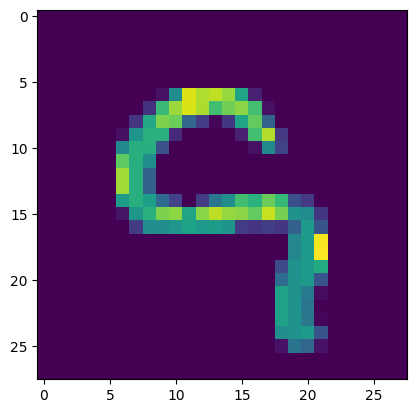

In [68]:
print(np.argmax(predictions[104]))
plt.imshow(x_test[104])

1


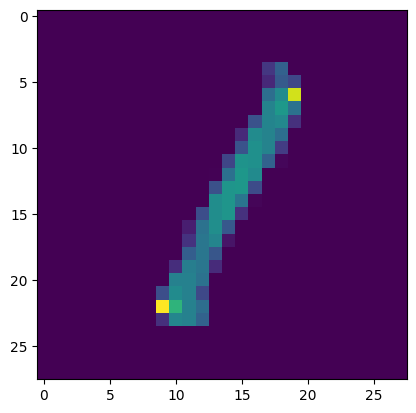

In [69]:
print(np.argmax(predictions[202]))
plt.imshow(x_test[202])